In [ ]:
import numpy as np
import pandas as pd
import random
import os
import tensorflow as tf

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
seed = 42
seed_everything(seed)

In [ ]:
dataset = pd.read_csv("/content/Raw Data (1).csv")

In [ ]:
dataset.head(10)

,T1,T2,T3,T4,T5,T6,T7,T8,CS,ML,Alarm
0,6,8,5,15,6,-3,112,13,77,174,1
1,105,7,10,203,17,17,93,-3,99,180,1
2,105,-1,9,197,-4,-3,95,5,98,180,1
3,101,17,12,207,20,23,83,-11,89,180,1
4,81,16,16,250,14,13,82,-7,89,183,1
5,82,10,23,247,11,12,82,-2,91,186,1
6,17,24,24,254,21,29,43,29,156,185,0
7,15,23,24,253,23,28,41,25,158,185,0
8,17,23,25,255,21,29,40,25,156,184,0
9,17,23,22,250,20,26,39,25,156,183,0


In [ ]:
dataset.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,CS,ML,Alarm
count,180.000000,180.00000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,21.700000,16.75000,16.144444,166.194444,20.894444,16.850000,49.388889,17.966667,122.283333,171.644444,0.500000
std,28.034277,9.94503,8.288191,110.169301,23.508348,13.110819,35.783394,11.510937,26.357719,43.283607,0.501395
min,-21.000000,-55.00000,-7.000000,-4.000000,-9.000000,-24.000000,-94.000000,-13.000000,63.000000,0.000000,0.000000
25%,9.750000,14.00000,10.750000,20.000000,14.000000,4.000000,36.000000,11.000000,98.000000,180.750000,0.000000
50%,16.000000,20.00000,20.000000,249.000000,20.000000,24.000000,41.000000,22.000000,122.500000,183.000000,0.500000
75%,20.000000,22.25000,23.000000,257.000000,22.000000,27.000000,81.000000,28.000000,145.000000,185.000000,1.000000
max,122.000000,37.00000,34.000000,271.000000,158.000000,32.000000,132.000000,36.000000,160.000000,207.000000,1.000000


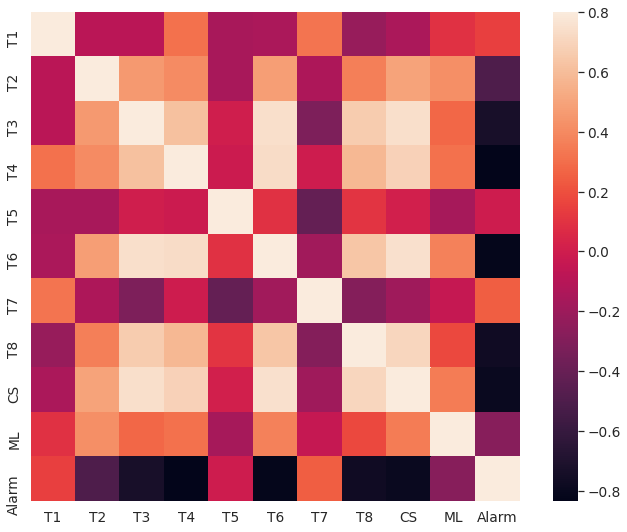

In [ ]:
#correlation matrix
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

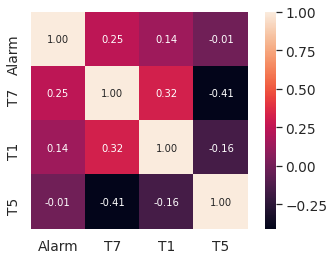

In [ ]:
k = 4 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Alarm')['Alarm'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

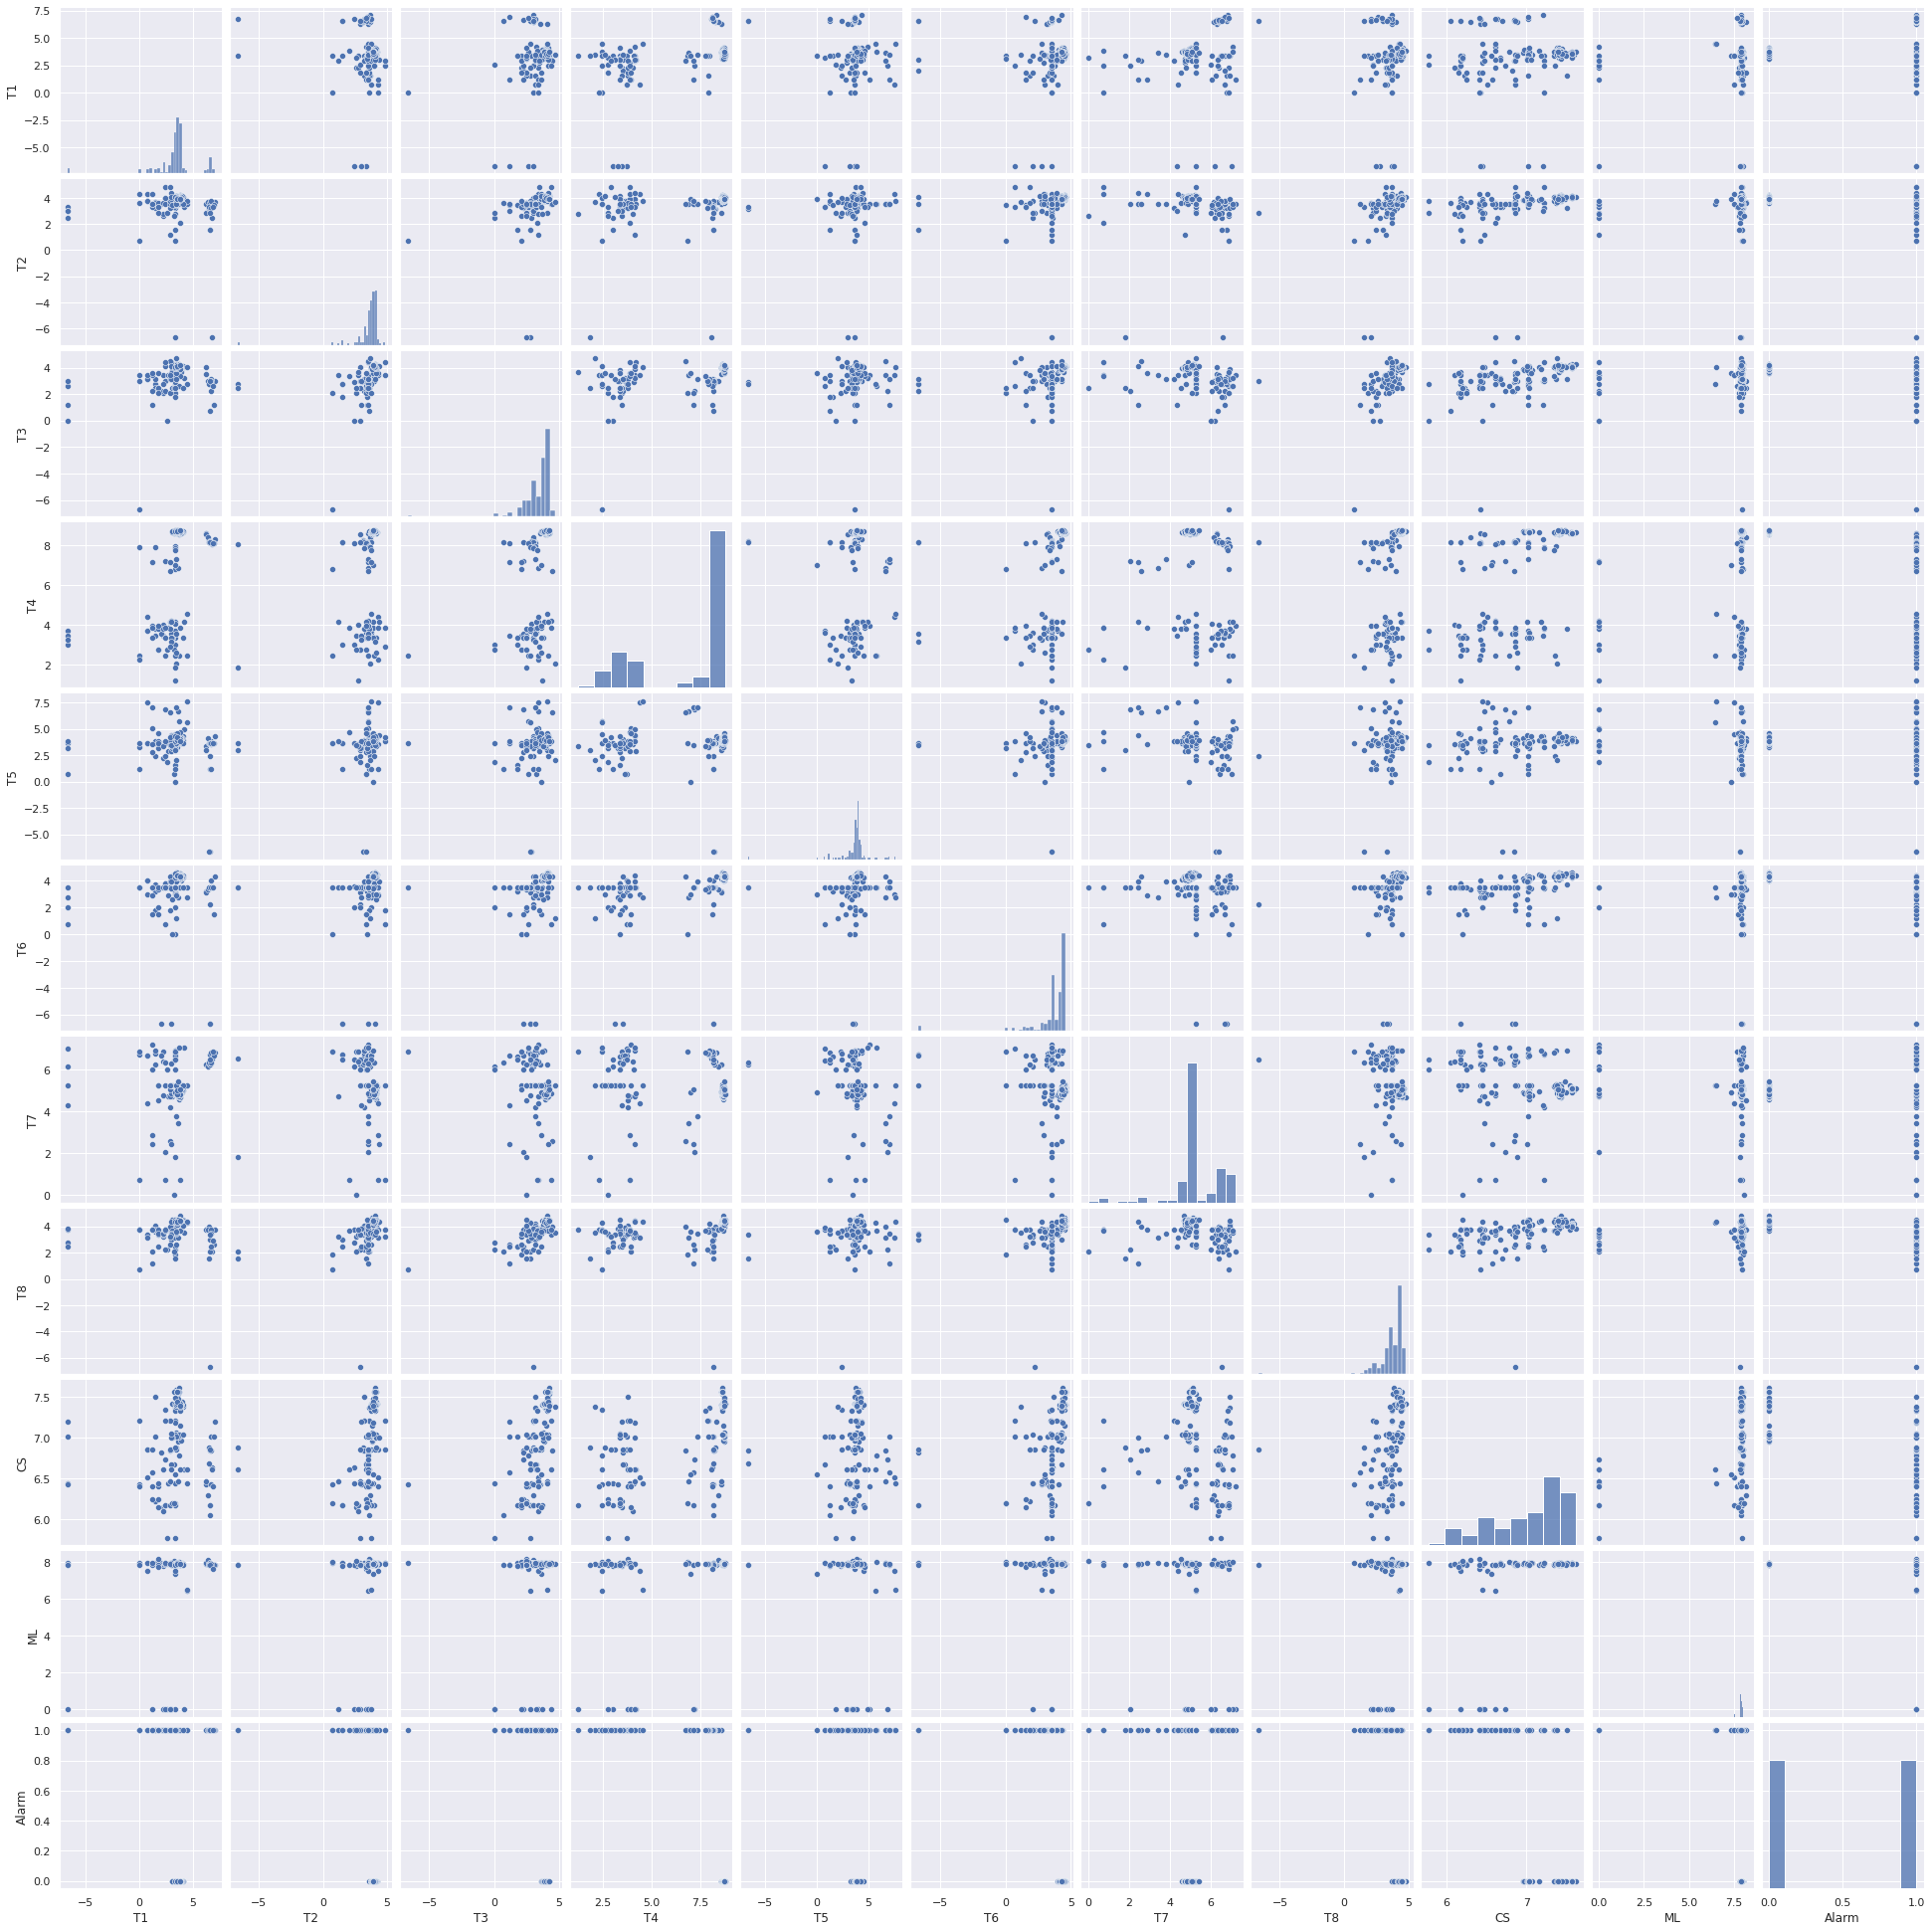

In [ ]:
sns.set()
sns.pairplot(dataset, height = 2.5)
plt.show();

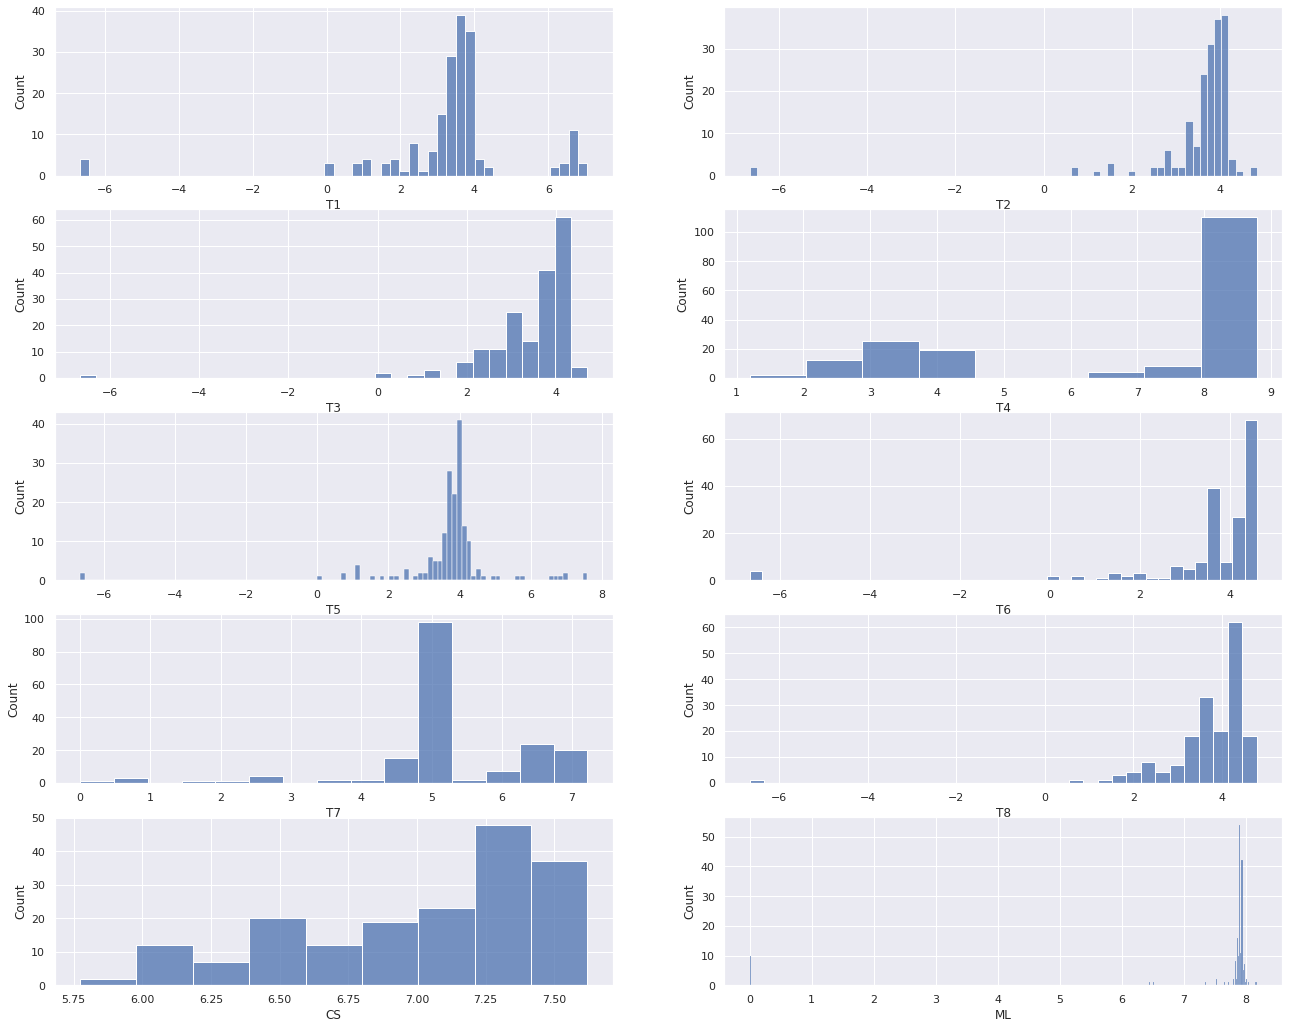

In [ ]:
fig, ax1 = plt.subplots(5,2, figsize=(22,18))
k = 0
columns = list(dataset.columns)
for i in range(5):
    for j in range(2):
            sns.histplot(dataset[columns[k]], ax = ax1[i][j])
            k += 1
plt.show()

In [ ]:
from scipy.stats import norm, skew

In [ ]:
feats = ['T1','T2','T3','T4','T5','T6','T7','T8','CS','ML']
skewed_feats = dataset[feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
CS,-0.668924
T4,-0.782765
T7,-1.477159
T1,-2.470257
T5,-3.570289
ML,-3.829898
T6,-4.450885
T3,-4.736759
T8,-5.394603
T2,-6.363728


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    dataset[feat] = boxcox1p(dataset[feat], lam)

There are 10 skewed numerical features to Box Cox transform


In [ ]:
dataset.fillna(dataset.mean(),inplace=True)

In [ ]:
X = dataset.iloc[:, 0:10].values
y = dataset.iloc[:, 10].values

In [ ]:
dataset.isnull().sum()

T1       0
T2       0
T3       0
T4       0
T5       0
T6       0
T7       0
T8       0
CS       0
ML       0
Alarm    0
dtype: int64

In [ ]:
X

array([[1.29281638, 1.41314146, 1.21601706, ..., 1.61234902, 2.28781852,
        2.57137994],
       [2.39732659, 1.35745656, 1.50539409, ..., 1.74962822, 2.3767137 ,
        2.58288765],
       [2.39732659, 1.7225765 , 1.46197126, ..., 1.21601706, 2.37314963,
        2.58288765],
       ...,
       [1.69570566, 1.82120443, 1.82120443, ..., 1.88588559, 2.51148566,
        2.5939983 ],
       [1.69570566, 1.80305114, 1.85499303, ..., 1.91432611, 2.51382674,
        2.58849092],
       [1.76378712, 1.80305114, 1.87077102, ..., 1.92773925, 2.50675226,
        2.58849092]])

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.2,random_state = seed)

In [ ]:
X_train.shape

(144, 10)

In [ ]:
X_test.shape

(36, 10)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

In [ ]:
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
X_train[0]

array([1.35745656, 1.82120443, 1.54444893, 1.64223486, 1.73665271,
       1.76378712, 2.32295095, 1.74962822, 2.2924174 , 2.5939983 ])

In [ ]:
X_train.shape[1]

10

In [ ]:
model = keras.Sequential([                     
    layers.Dense(16, activation='relu', input_shape=[X_train.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(12, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    # optimizer= keras.optimizers.Adam(
    # learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    # name='Adam'),
    optimizer= 'Adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=16,
    epochs=100,
    )

Epoch 1/100
9/9 [==============================] - 1s 27ms/step - loss: 1.4048 - accuracy: 0.2401 - val_loss: 0.7265 - val_accuracy: 0.5833
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 1.3466 - accuracy: 0.2294 - val_loss: 0.7214 - val_accuracy: 0.5833
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 1.3062 - accuracy: 0.2677 - val_loss: 0.7143 - val_accuracy: 0.5833
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 1.1414 - accuracy: 0.2580 - val_loss: 0.7068 - val_accuracy: 0.5833
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 1.0165 - accuracy: 0.3424 - val_loss: 0.6979 - val_accuracy: 0.5833
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 1.0375 - accuracy: 0.3438 - val_loss: 0.6877 - val_accuracy: 0.5833
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.8833 - accuracy: 0.5218 - val_loss: 0.6743 - val_accuracy: 0.5833
Epoch 8/100
9/9 [=========

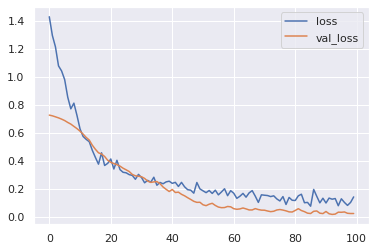

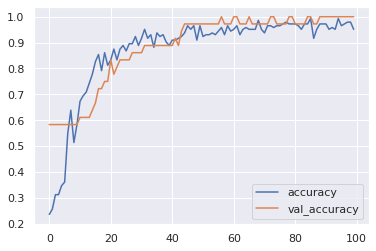

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

In [ ]:
print("Minimum Test Loss: {:0.4f}".format(history_df['val_loss'].min()))
print("Highest Test Accuracy: {:0.4f}".format(history_df['val_accuracy'].max()))

Minimum Test Loss: 0.0194
Highest Test Accuracy: 1.0000


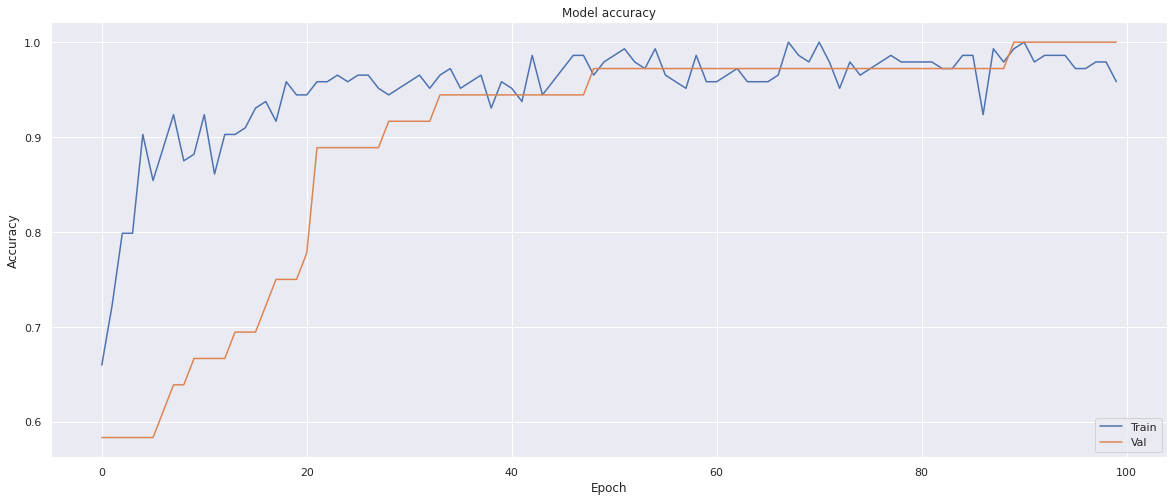

In [ ]:
 # showing a plot of how Accurate the model is against the 
# test dataset
plt.figure(figsize=(20, 8))
plt.grid(True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

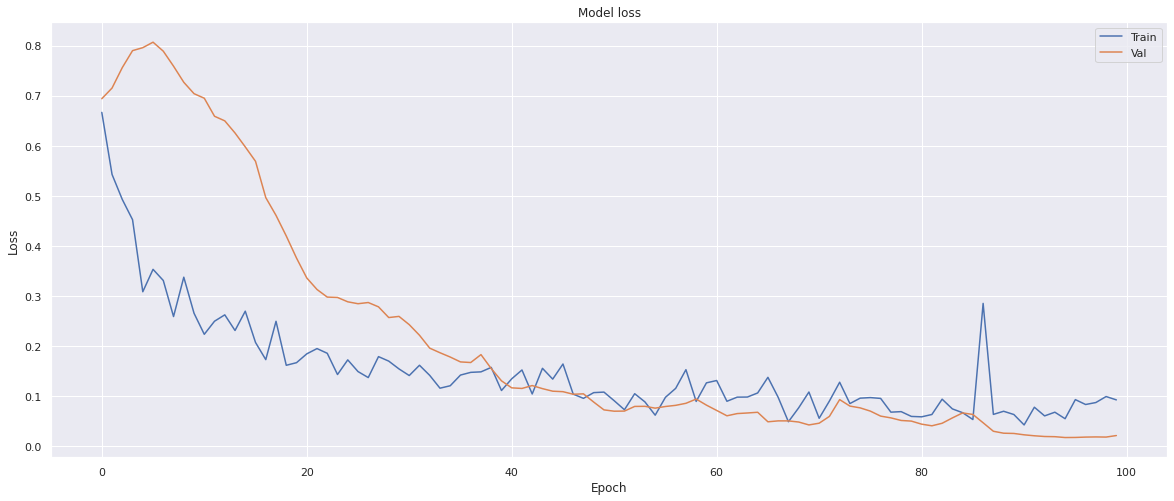

In [ ]:
# showing a plot of the loss with respect to the number of epochs 
plt.figure(figsize=(20, 8))
plt.grid(True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show() 